In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Lab 1

In [2]:
dataset_file = '../datasets/USArrests.csv'
seed = 1

data = pd.read_csv(dataset_file, index_col='State')
data.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
print(f'\tMeans:\n{data.mean()}')
print(f'\n\tVars:\n{data.std() ** 2}')

	Means:
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

	Vars:
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [4]:
data = (data - data.mean()) / data.std()

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA().fit(data)

In [7]:
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [8]:
scores = pca.transform(data)
scores.shape

(50, 4)

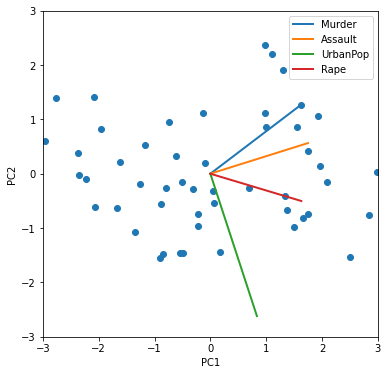

In [9]:
plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
for feature in loadings.index:
    plt.plot([0, loadings['PC1'][feature] * 3], [0, loadings['PC2'][feature] * 3], lw=2, label=feature)
plt.legend(loc='upper right')

In [10]:
var = scores.std(axis=0) ** 2
pve = var / var.sum()
pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Text(0.5, 1.0, 'Cumulative  Proportion  of Variance  Explained')

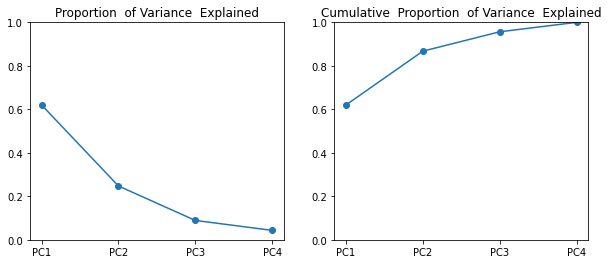

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=[10, 4])
plt.sca(axes[0])
plt.plot(np.arange(1, 5), pve, 'o-')
plt.xticks(np.arange(1, 5), labels=loadings.columns)
plt.ylim(0, 1)
plt.title('Proportion  of Variance  Explained')

plt.sca(axes[1])
plt.plot(np.arange(1, 5), pve.cumsum(), 'o-')
plt.xticks(np.arange(1, 5), labels=loadings.columns)
plt.ylim(0, 1)
plt.title('Cumulative  Proportion  of Variance  Explained')

# Lab 2

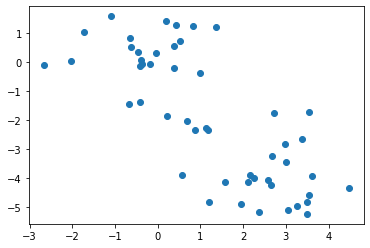

In [12]:
seed = 2
np.random.seed(seed)
X = np.random.normal(size=100).reshape(50, 2)
X[:25, 0] = X[:25, 0] + 3
X[:25, 1] = X[:25, 1] - 4
plt.scatter(X[:, 0], X[:, 1])

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

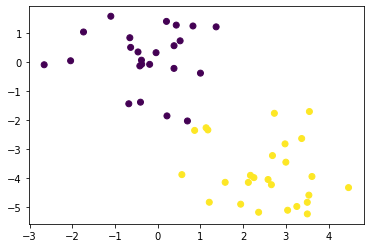

In [14]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

Clusters means:
[[ 1.72794239 -2.36932903]
 [-0.30258511  0.33731239]
 [ 2.74924851 -4.40059558]]

Sum of squares: 69.917


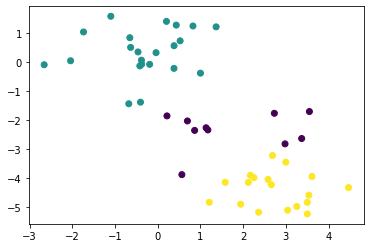

In [15]:
km = KMeans(n_clusters=3, n_init=1, init='random', random_state=seed)
clusters = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
print(f'Clusters means:\n{km.cluster_centers_}')
print(f'\nSum of squares: {km.inertia_:.3f}')

Clusters means:
[[ 0.72954539 -1.97251836]
 [ 2.82805911 -4.11351797]
 [-0.34608792  0.5592591 ]]

Sum of squares: 69.307


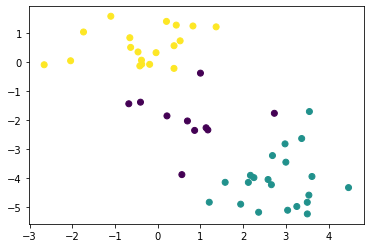

In [16]:
km = KMeans(n_clusters=3, n_init=20, init='random', random_state=seed)
clusters = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
print(f'Clusters means:\n{km.cluster_centers_}')
print(f'\nSum of squares: {km.inertia_:.3f}')

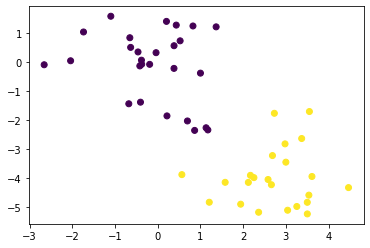

In [17]:
hc = AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

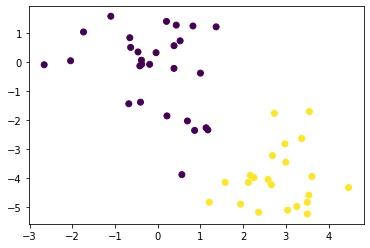

In [18]:
hc = AgglomerativeClustering(n_clusters=2, linkage='average')
clusters = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

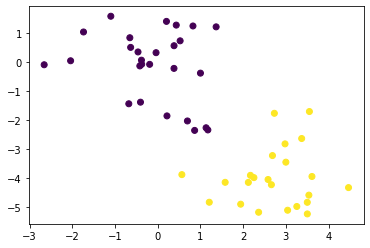

In [19]:
hc = AgglomerativeClustering(n_clusters=2, linkage='single')
clusters = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

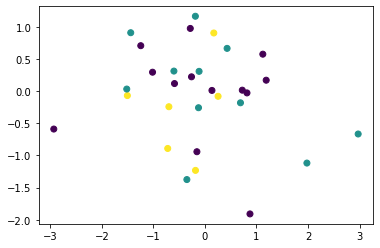

In [20]:
X_triple = np.random.normal(size=90).reshape(30, 3)
hc_corr = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
clusters = hc_corr.fit_predict(np.corrcoef(X_triple))
plt.scatter(X_triple[:, 0], X_triple[:, 1], c=clusters)

# Lab 3

In [21]:
from sklearn.preprocessing import LabelEncoder

In [35]:
dataset_file = '../datasets/NCI60_Ross.csv'
seed = 1

data = pd.read_csv(dataset_file, index_col=0)
data.drop(['Unigene ID'], axis=1, inplace=True)
data = data.transpose()
types_str = [name.split('_')[0] for name in data.index]
types_num = LabelEncoder().fit_transform(types_str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, BREAST_BT549 to RENAL_UO31
Columns: 1375 entries, 61539 to 512164
dtypes: float64(1375)
memory usage: 645.0+ KB


Text(0, 0.5, 'PC3')

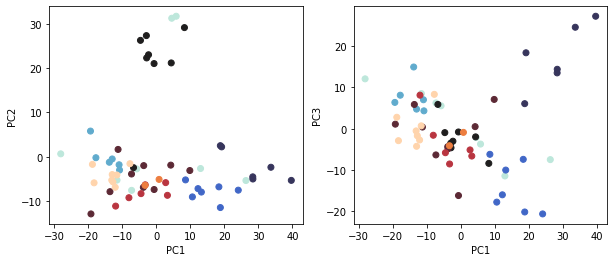

In [36]:
data = data / data.std()
pca = PCA().fit(data)
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=[f'PC{i+1}'for i in range(pca.components_.shape[0])])
scores = pca.transform(data)

fig, axes = plt.subplots(ncols=2, figsize=[10, 4])

plt.sca(axes[0])
plt.scatter(scores[:, 0], scores[:, 1], c=types_num, cmap='icefire')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.sca(axes[1])
plt.scatter(scores[:, 0], scores[:, 2], c=types_num, cmap='icefire')
plt.xlabel('PC1')
plt.ylabel('PC3')

In [37]:
var = scores.std(axis=0) ** 2
pve = var / var.sum()

Text(0.5, 1.0, 'Cumulative  Proportion  of Variance  Explained')

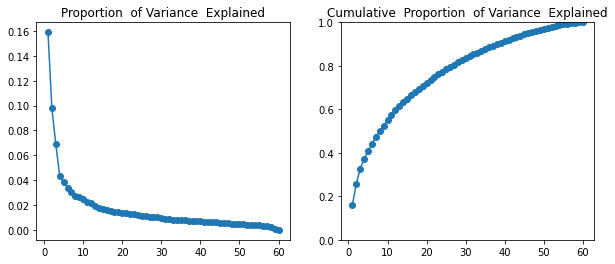

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=[10, 4])
plt.sca(axes[0])
plt.plot(np.arange(loadings.shape[1])+1, pve, 'o-')
plt.title('Proportion  of Variance  Explained')

plt.sca(axes[1])
plt.plot(np.arange(loadings.shape[1])+1, pve.cumsum(), 'o-')
plt.ylim(0, 1)
plt.title('Cumulative  Proportion  of Variance  Explained')

In [39]:
from scipy.cluster import hierarchy

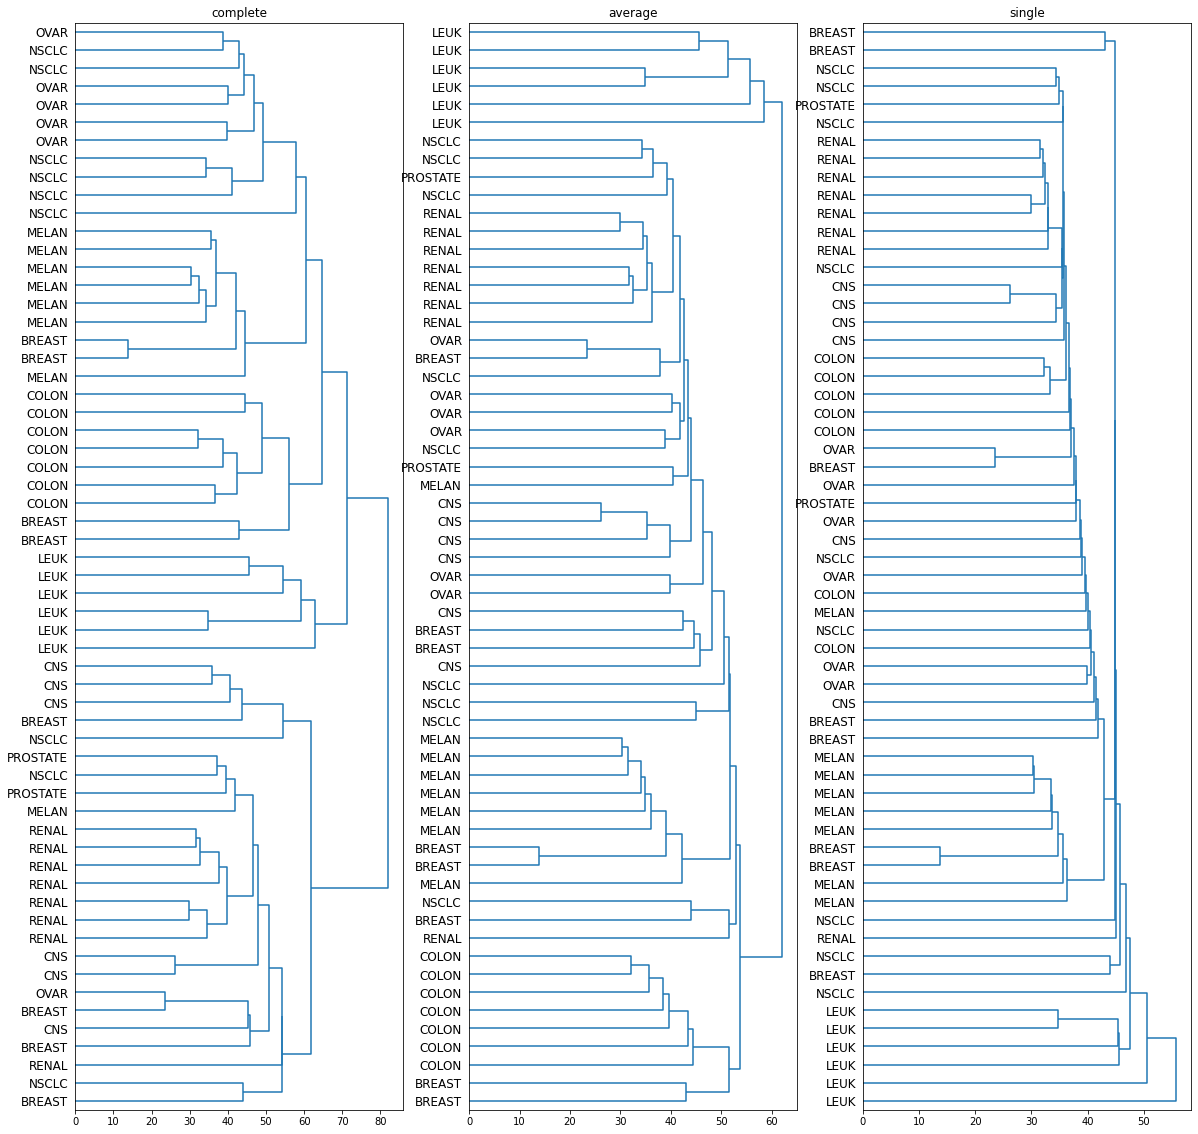

In [44]:
figs, axes = plt.subplots(ncols=3, figsize=[20, 20])
for i, linkage in enumerate(['complete', 'average', 'single']):
    Z = hierarchy.linkage(data, linkage)
    hierarchy.dendrogram(Z, labels=types_str, orientation='right', color_threshold=0, leaf_font_size=12, ax=axes[i])
    axes[i].set_title(linkage)

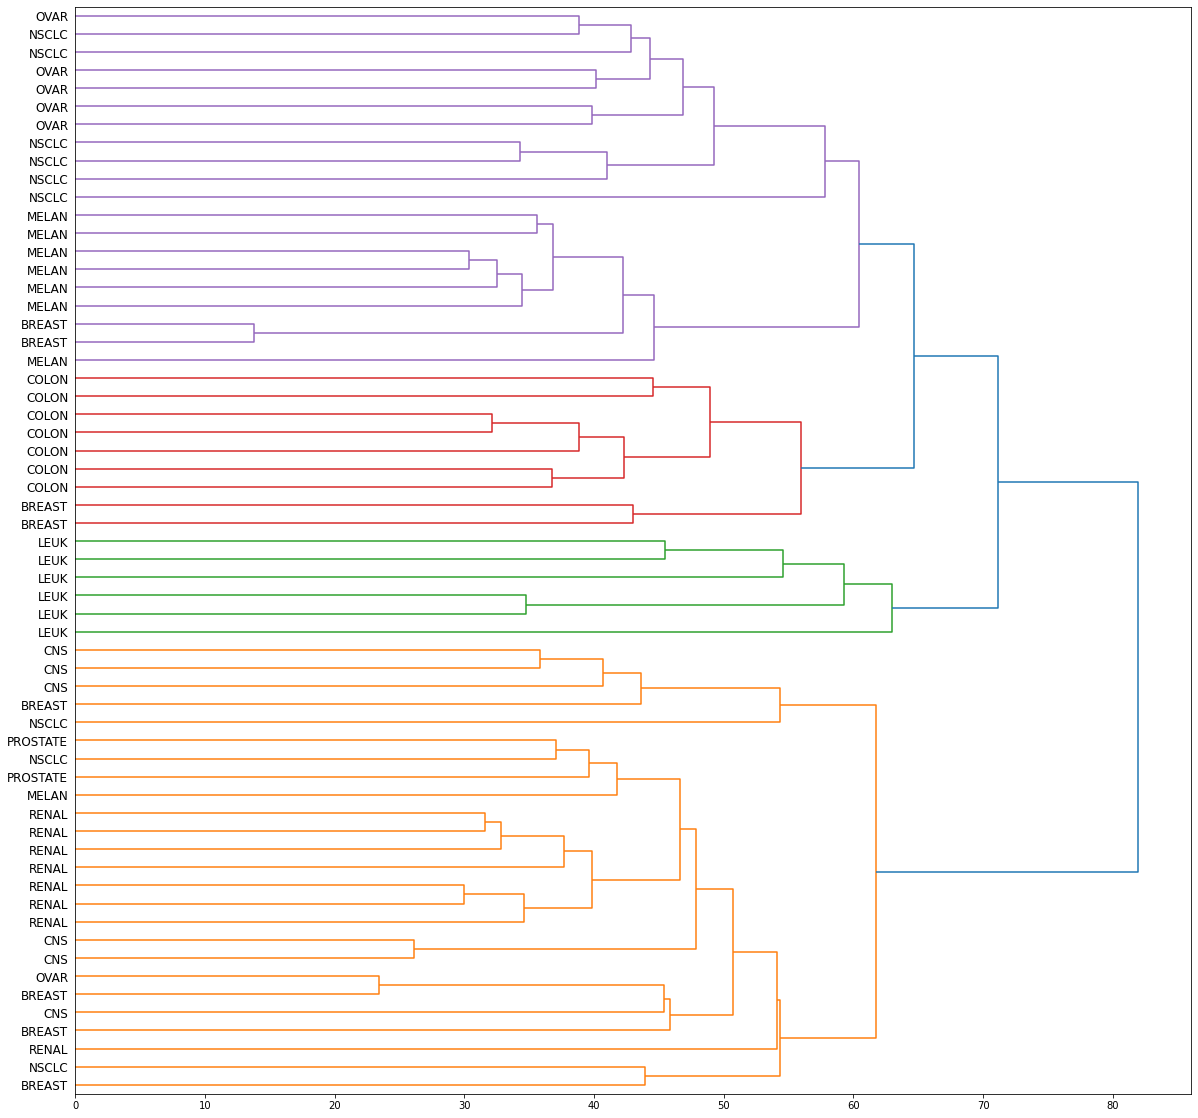

In [50]:
plt.figure(figsize=[20,20])
Z = hierarchy.linkage(data, 'complete')
hierarchy.dendrogram(Z, labels=types_str, orientation='right', color_threshold=64, leaf_font_size=12);

In [53]:
km = KMeans(n_clusters=4, n_init=50, init='random', random_state=seed)
km.fit(data)
kmeans_clusters = km.labels_
pd.Series(kmeans_clusters).value_counts()

0    24
3    21
1     9
2     6
dtype: int64

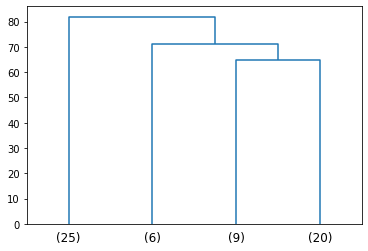

In [55]:
hierarchy.dendrogram(hierarchy.complete(data), truncate_mode='lastp', p=4, show_leaf_counts=True);

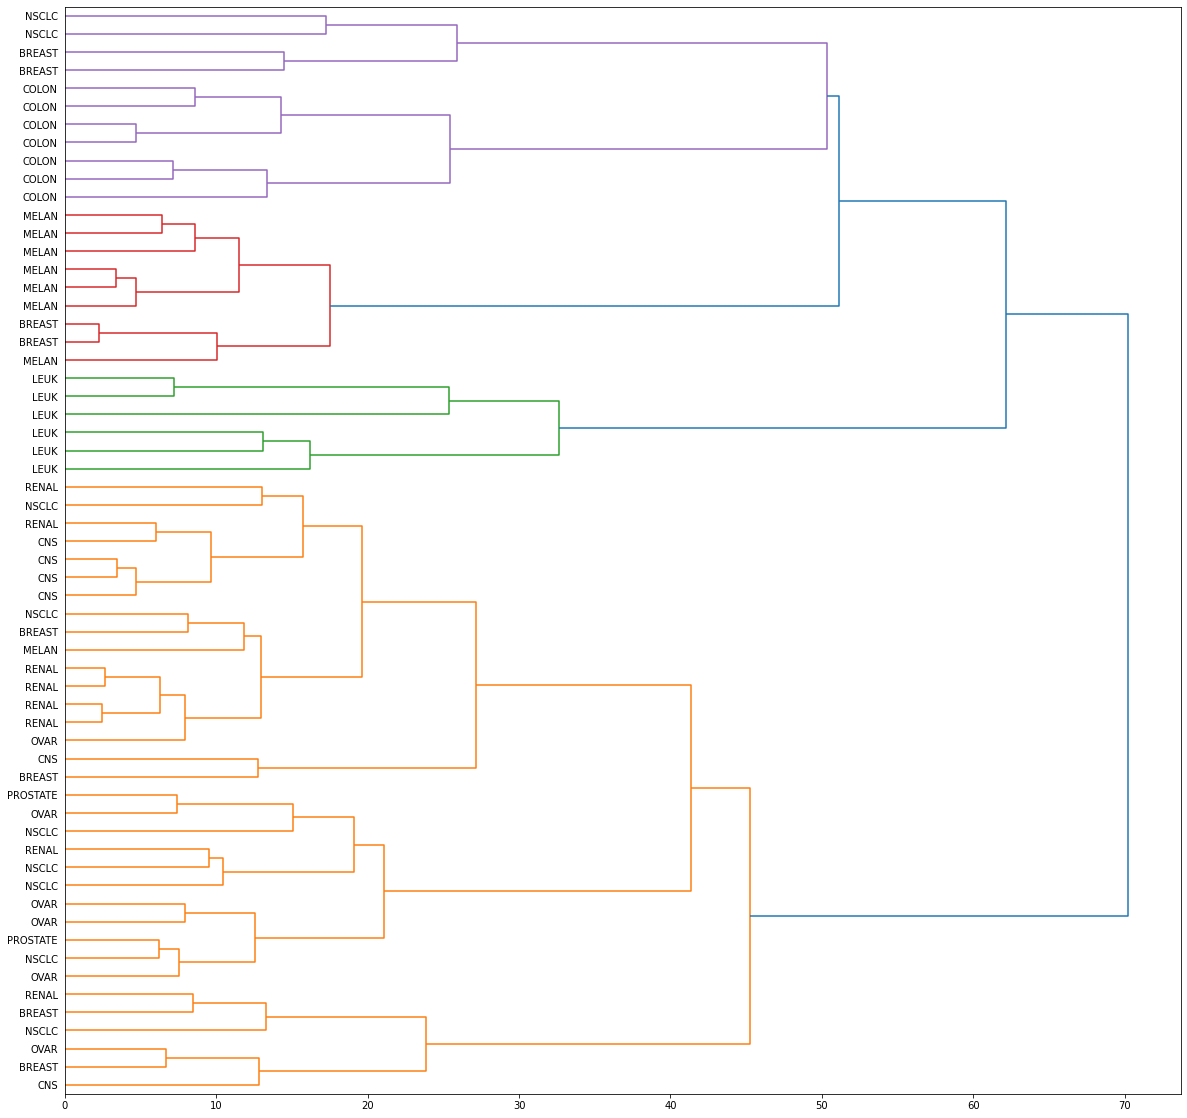

In [59]:
plt.figure(figsize=[20,20])
pca_cluster = hierarchy.dendrogram(hierarchy.complete(scores[:,:5]), labels=types_str, orientation='right', color_threshold=51, leaf_font_size=10)

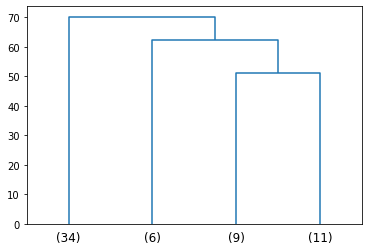

In [60]:
hierarchy.dendrogram(hierarchy.complete(scores[:,:5]), truncate_mode='lastp', p=4, show_leaf_counts=True);